In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/OpenCv/main/OpenCV_Python_Developers/02_Object%20Detection/detect_blob.png

--2025-02-19 04:01:07--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/OpenCV_Python_Developers/02_Object%20Detection/detect_blob.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34115 (33K) [image/png]
Saving to: ‘detect_blob.png.1’

detect_blob.png.1   100%[===================>]  33.32K  --.-KB/s    in 0.01s   

2025-02-19 04:01:07 (3.14 MB/s) - ‘detect_blob.png.1’ saved [34115/34115]



#Detect

Origiginal


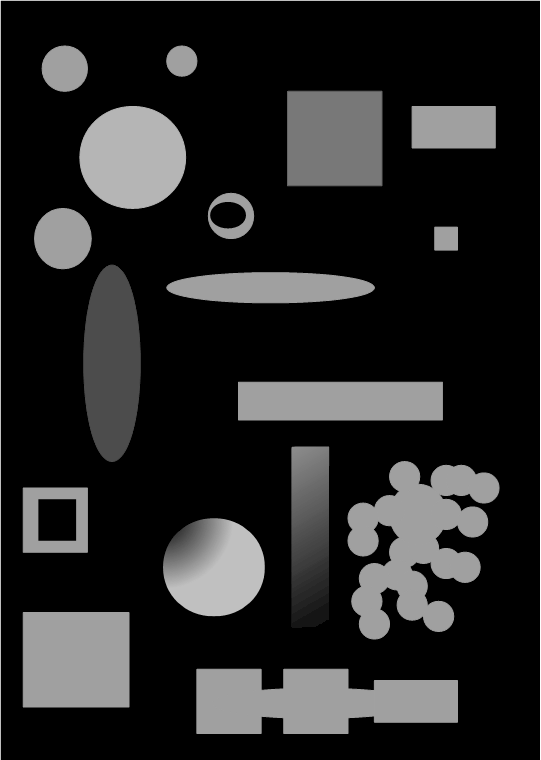

In [ ]:
bw=cv2.imread('detect_blob.png',0)
height,width=bw.shape[0:2]

print("Origiginal")
cv2_imshow(bw)

##Slow Binary

Slow Binary


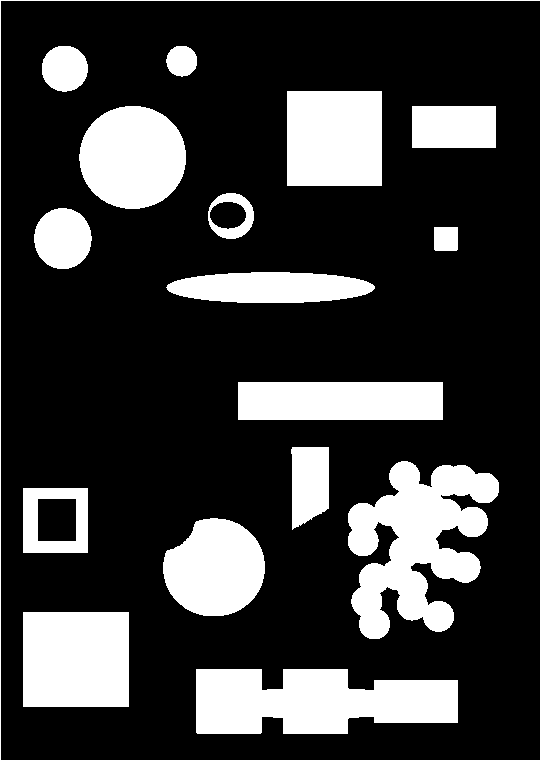

In [ ]:
binary=np.zeros([height,width,1], 'uint8')

tresh=85

for row in range(0,height):
  for col in range(0,width):
    if bw[row,col]>tresh:
      binary[row,col]=255

print("Slow Binary")
cv2_imshow(binary)

##Tresh Binary

85.0
Tresh Binary


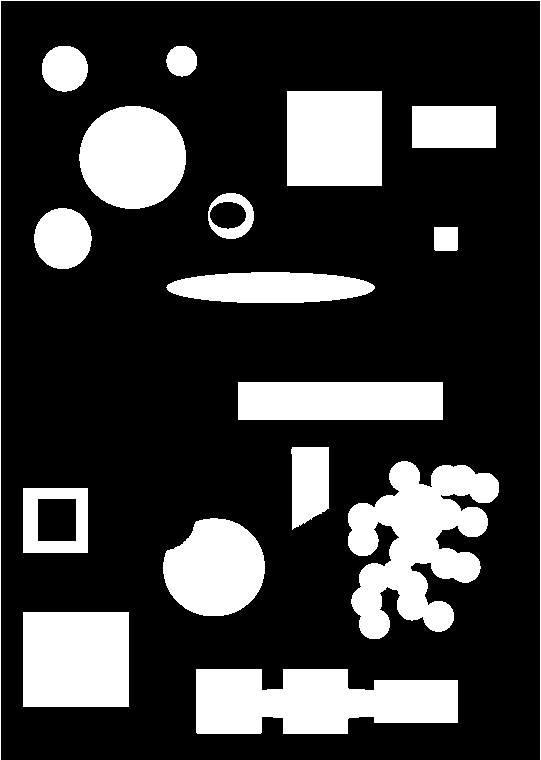

In [ ]:
ret,binary=cv2.threshold(bw,tresh,255,cv2.THRESH_BINARY)
print(ret)
print("Tresh Binary")
cv2_imshow(binary)

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/OpenCv/main/OpenCV_Python_Developers/02_Object%20Detection/sudoku.png

--2025-02-19 04:01:08--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/OpenCV_Python_Developers/02_Object%20Detection/sudoku.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250720 (245K) [image/png]
Saving to: ‘sudoku.png.1’

sudoku.png.1        100%[===================>] 244.84K  --.-KB/s    in 0.04s   

2025-02-19 04:01:08 (6.58 MB/s) - ‘sudoku.png.1’ saved [250720/250720]



Origiginal


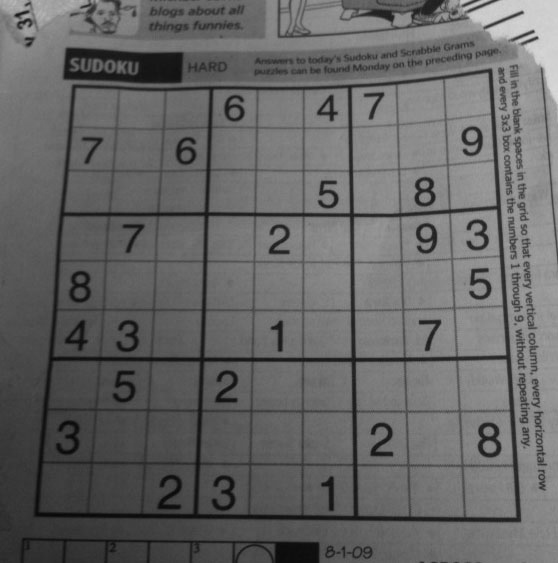

In [ ]:
img=cv2.imread('sudoku.png',0)
print("Origiginal")
cv2_imshow(img)

Basic Binary


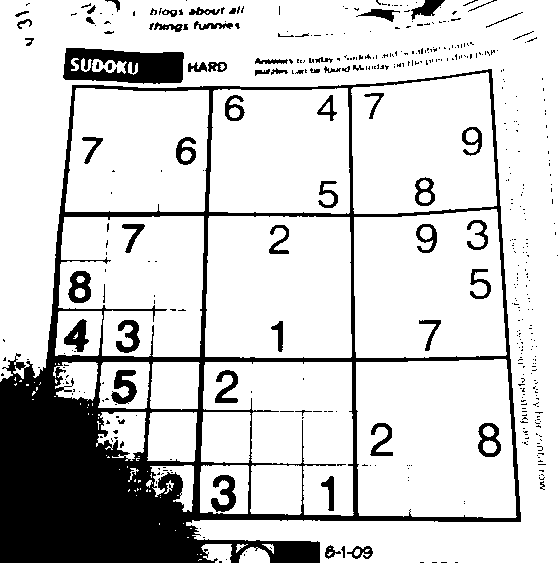

In [ ]:
ret,tresh_basic=cv2.threshold(img,70,255,cv2.THRESH_BINARY)
print("Basic Binary")
cv2_imshow(tresh_basic)

##Adaptive Treshold

Adaptive Binary


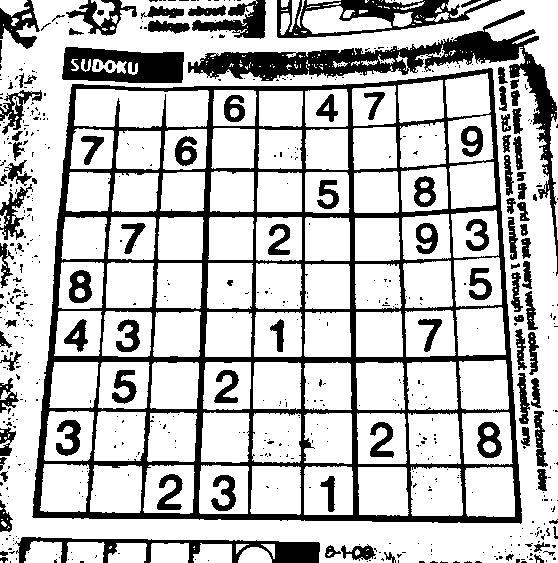

In [ ]:
tresh_adapt=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
print("Adaptive Binary")
cv2_imshow(tresh_adapt)

##https://colab.research.google.com/drive/1UU3BEywp3pJ13iz2ynBZnHgAjDajIr32#scrollTo=zp1sRUandRTM

#Contours

Origiginal


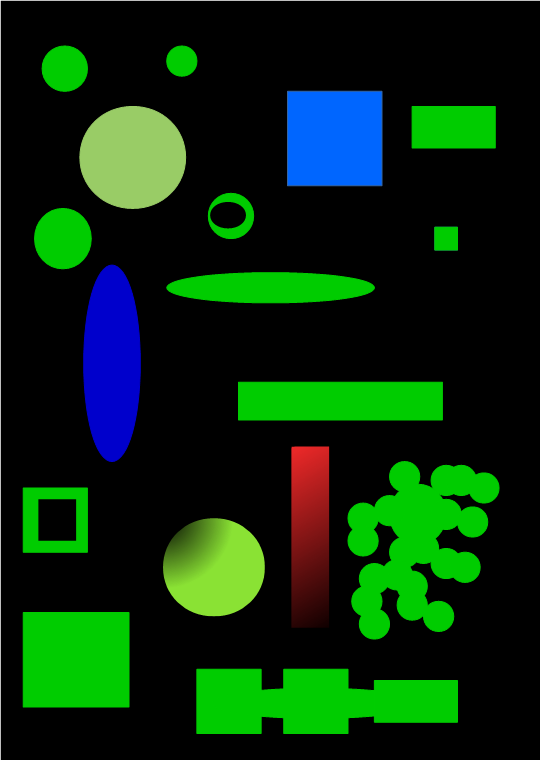

In [ ]:
img=cv2.imread('detect_blob.png',1)
print("Origiginal")
cv2_imshow(img)

Gray


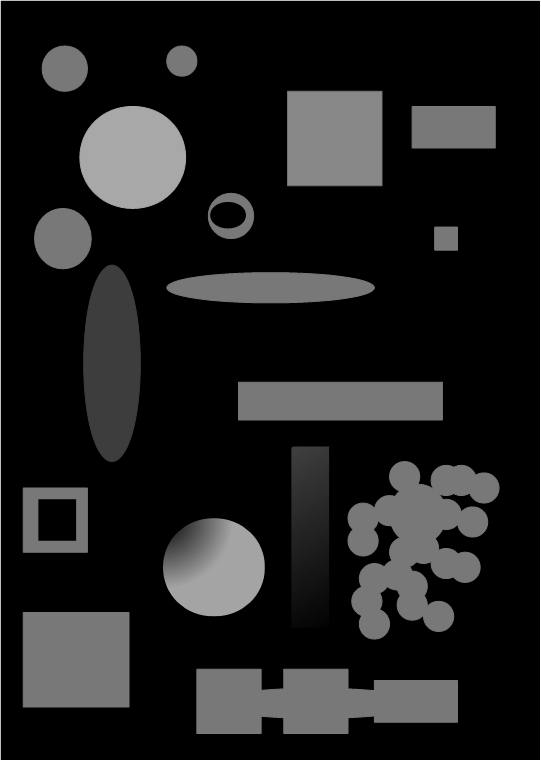

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print("Gray")
cv2_imshow(gray)

Tresh Binary


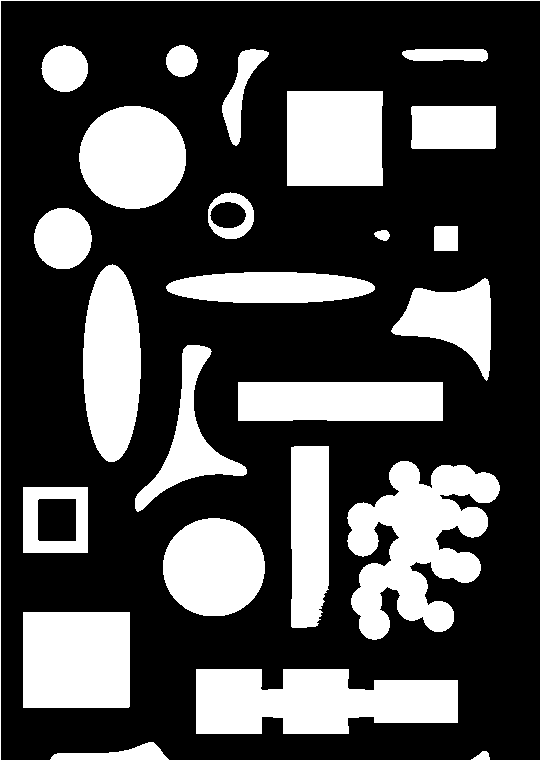

In [ ]:
tresh=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
print("Tresh Binary")
cv2_imshow(tresh)

27
Contours


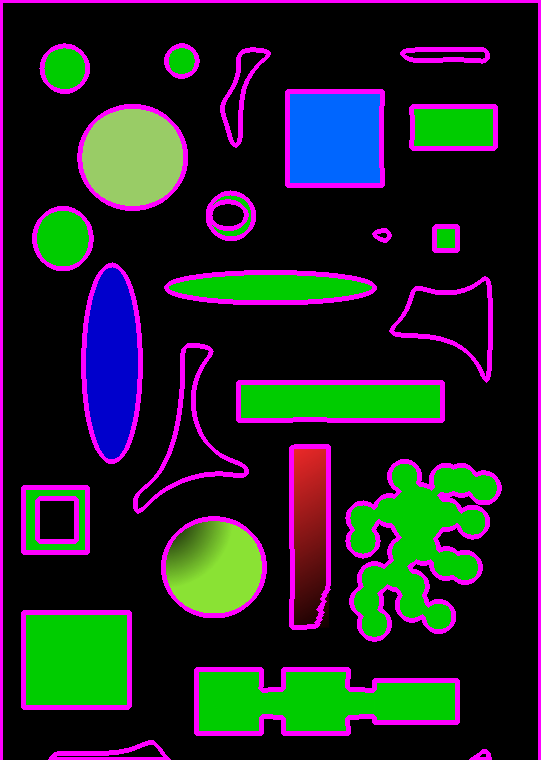

In [ ]:
countours,hierarchies=cv2.findContours(tresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(countours))

img2=img.copy()
index=-1
thickness=4
color=(255,0,255)
cv2.drawContours(img2,countours,index,color,thickness)
print("Contours")
cv2_imshow(img2)

##Area perimeter center and curvature

Area: 86.5,  Perimeter: 45.55634891986847,  Center: (482,755),  Radius: 1.2087801506362414
Area: 959.5,  Perimeter: 251.8406196832657,  Center: (118,754),  Radius: 2.425489074617629
Area: 13091.5,  Perimeter: 754.0416301488876,  Center: (314,701),  Radius: 11.05284830003956
Area: 10069.5,  Perimeter: 401.41421353816986,  Center: (75,659),  Radius: 15.96964577151377
Area: 7780.0,  Perimeter: 329.22034430503845,  Center: (213,566),  Radius: 15.04433706694226
Area: 4160.0,  Perimeter: 258.0,  Center: (55,519),  Radius: 10.264876949802863
Area: 1672.0,  Perimeter: 160.48528122901917,  Center: (56,519),  Radius: 6.63256001576626
Area: 14515.0,  Perimeter: 1225.768675327301,  Center: (416,542),  Radius: 7.538564316344651
Area: 6357.0,  Perimeter: 446.9116872549057,  Center: (309,532),  Radius: 9.055462205069668
Area: 7718.0,  Perimeter: 484.8284270763397,  Center: (340,400),  Radius: 10.13437151934851
Area: 4592.5,  Perimeter: 502.0315263271332,  Center: (188,439),  Radius: 5.823690647453473

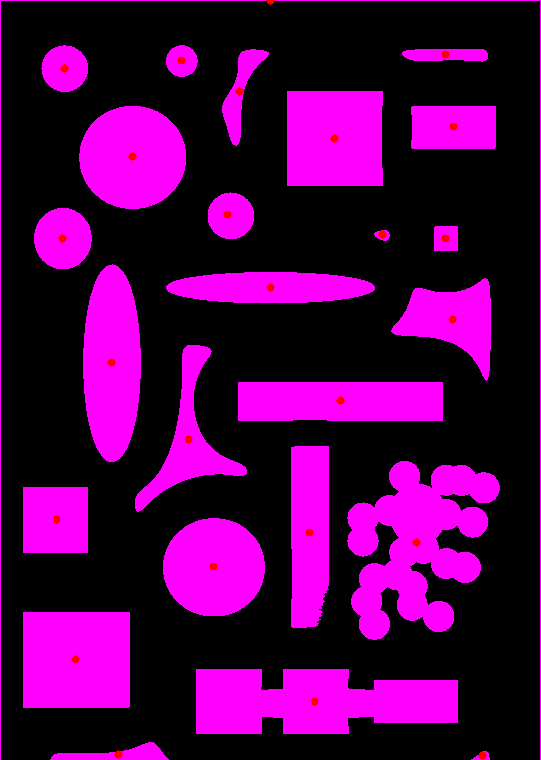

In [ ]:
objects=np.zeros([img.shape[0],img.shape[1],3],'uint8')
for countour in countours:
  cv2.drawContours(objects,[countour],-1,color,-1)
  area=cv2.contourArea(countour)
  perimeter=cv2.arcLength(countour,True)
  M=cv2.moments(countour)
  cx=int(M['m10']/M['m00'])
  cy=int(M['m01']/M['m00'])
  cv2.circle(objects,(cx,cy),4,(0,0,255),-1)
  print(f"Area: {area},  Perimeter: {perimeter},  Center: ({cx},{cy}),  Radius: {area/(np.pi*perimeter/2)}")
print("Objects")
cv2_imshow(objects)

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/OpenCv/main/OpenCV_Python_Developers/02_Object%20Detection/tomatoes.jpg

--2025-02-19 04:01:08--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/OpenCV_Python_Developers/02_Object%20Detection/tomatoes.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198564 (194K) [image/jpeg]
Saving to: ‘tomatoes.jpg’

tomatoes.jpg        100%[===================>] 193.91K  --.-KB/s    in 0.03s   

2025-02-19 04:01:08 (5.59 MB/s) - ‘tomatoes.jpg’ saved [198564/198564]



Origiginal


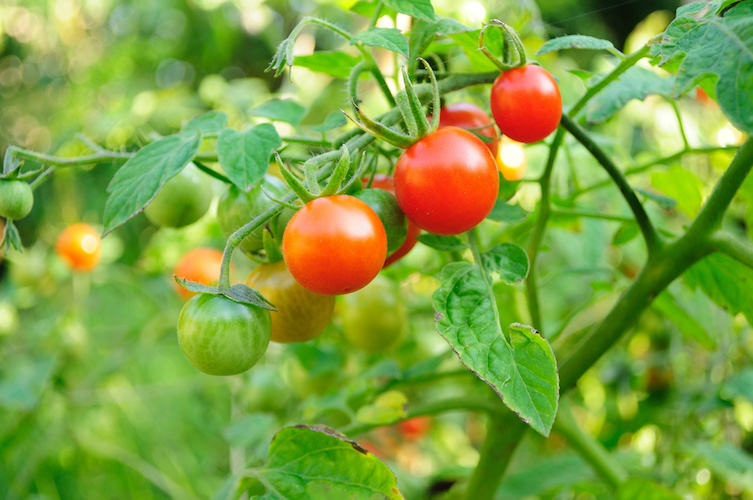

In [ ]:
img=cv2.imread('tomatoes.jpg',1)
print("Origiginal")
cv2_imshow(img)

##Tresh

Tresh


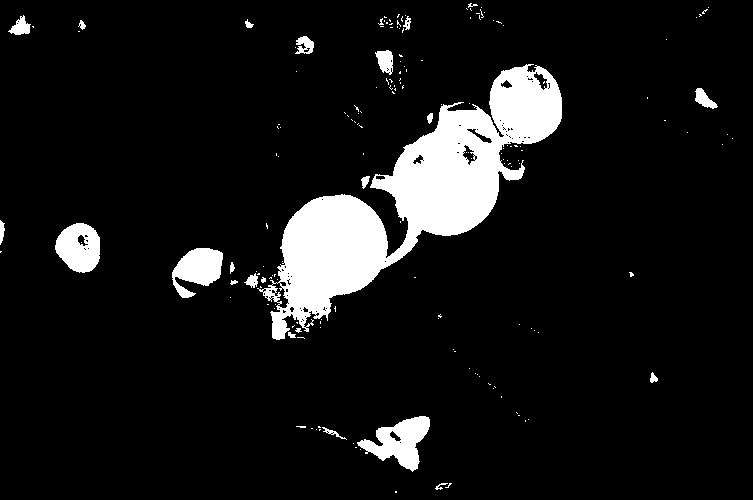

In [ ]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
res,tresh=cv2.threshold(hsv[:,:,0],25,255,cv2.THRESH_BINARY_INV)
print("Tresh")
cv2_imshow(tresh)

##Canny

Canny


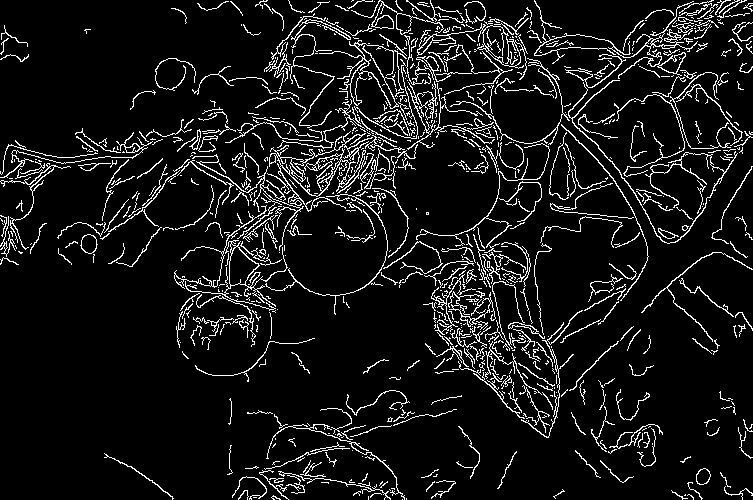

In [ ]:
edges=cv2.Canny(img,100,200,apertureSize=3)
print("Canny")
cv2_imshow(edges)

##Canny Tresh


Canny Tresh


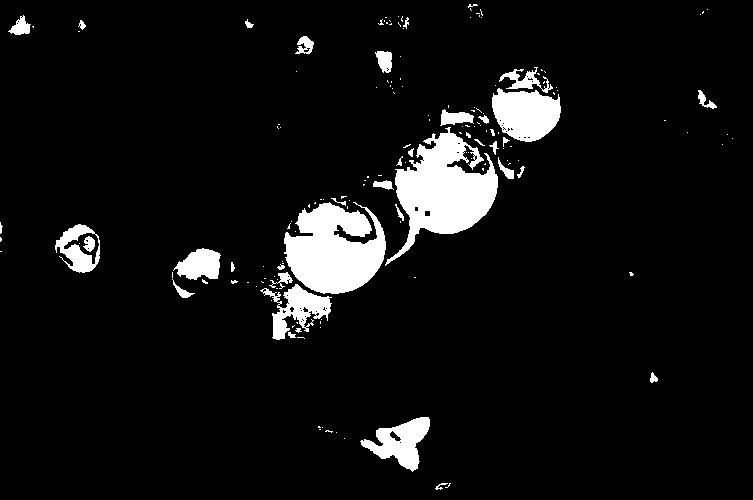

In [ ]:
edge_inv=255-edges

kernel=np.ones((3,3),'uint8')
erode=cv2.erode(edge_inv,kernel,iterations=1)

canny_tresh=cv2.bitwise_and(erode,tresh)

print("Canny Tresh")
cv2_imshow(canny_tresh)

Area 1788.5
Area 1518.5
Area 966.5
Area 1436.0
Area 517.5
Area 6313.5
Area 6930.0
Area 307.0
Area 2636.0
Area 374.0
Final draw-over


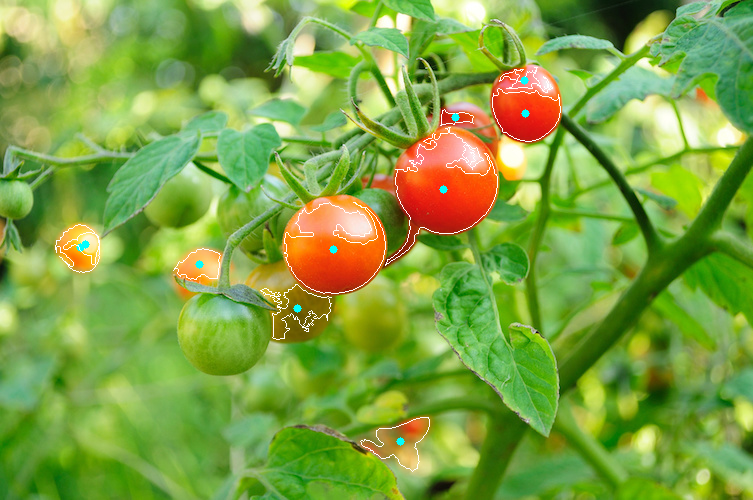

In [ ]:
contours,hierarchies=cv2.findContours(canny_tresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

objects=img.copy()
for countour in contours:
  area=cv2.contourArea(countour)
  if area<300:
    continue
  print("Area",area)
  cv2.drawContours(objects,[countour],-1,(255,255,255),1)
  M=cv2.moments(countour)
  cx=int(M['m10']/M['m00'])
  cy=int(M['m01']/M['m00'])
  cv2.circle(objects,(cx,cy),4,(255,255,0),-1)
print("Final draw-over")
cv2_imshow(objects)

##Atributes

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/OpenCv/main/OpenCV_Python_Developers/02_Object%20Detection/fuzzy.png

--2025-02-19 04:01:09--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/OpenCV_Python_Developers/02_Object%20Detection/fuzzy.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259603 (254K) [image/png]
Saving to: ‘fuzzy.png’

fuzzy.png           100%[===================>] 253.52K  --.-KB/s    in 0.04s   

2025-02-19 04:01:09 (6.71 MB/s) - ‘fuzzy.png’ saved [259603/259603]



Origiginal


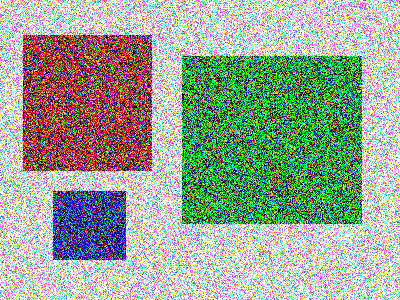

In [ ]:
img=cv2.imread('fuzzy.png',1)
print("Origiginal")
cv2_imshow(img)

Gray


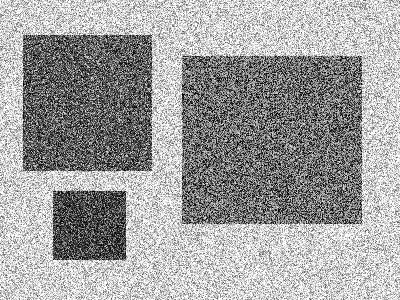

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("Gray")
cv2_imshow(gray)

Blur


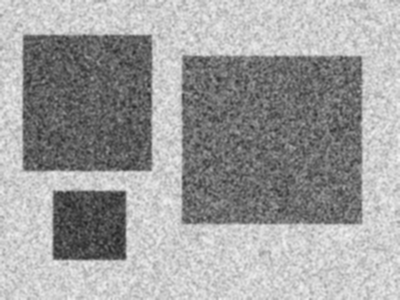

In [ ]:
blur=cv2.GaussianBlur(gray,(5,5),0)
print("Blur")
cv2_imshow(blur)

Tresh


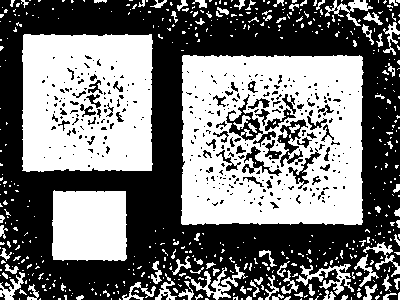

In [ ]:
tresh=cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,205,1)
print("Tresh")
cv2_imshow(tresh)

In [ ]:
contours,hierarchies=cv2.findContours(tresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

filtered=[]
for countour in contours:
  area=cv2.contourArea(countour)
  if area<1000:
    continue
  filtered.append(countour)
print(len(filtered))

933
3


In [ ]:
from random import randint

Area: 4942.0
Area: 29907.5
Area: 17280.5
Objects


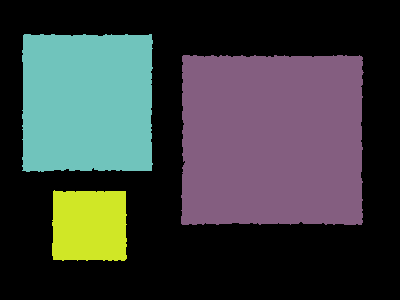

In [ ]:
objects=np.zeros([img.shape[0],img.shape[1],3],'uint8')
for countour in filtered:
  col=(randint(0,255),randint(0,255),randint(0,255))
  cv2.drawContours(objects,[countour],-1,col,-1)
  area=cv2.contourArea(countour)
  print(f"Area: {area}")
print("Objects")
cv2_imshow(objects)